I will be conducting my processing for tags in this notebook, and then bringing them over to R to use in my project.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import data
data=pd.read_csv(r'data\Youtube_Working_Dataset.csv')
data

,video_id,title,channelId,channelTitle,publishedAt,trending_date,publish_to_trending_days,category_text,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,ol4BJbIZHW4,(animated spellbook) 5E D&D Technology wizard,UCCXR2kCo7Lcw_BKwWxo09kw,Zee Bashew,2020-08-07 14:00:30,2020-08-12,4.42,Film & Animation,[None],159860,17038,123,1026,False,False
1,5WjcDji3xYc,Honest Trailers | Avatar: The Last Airbender,UCOpcACMWblDls9Z6GERVi1A,Screen Junkies,2020-08-11 17:03:59,2020-08-12,0.29,Film & Animation,screenjunkies|screen junkies|honest trailers|h...,833369,50181,1120,4634,False,False
2,yVdH3QacEXc,Selena Gomez - This is the Year (Official Prem...,UCPNxhDvTcytIdvwXWAm43cA,Selena Gomez,2020-08-10 16:32:06,2020-08-12,1.31,Film & Animation,Selena Gomez|David Henrie|Dixie D’Amelio|Charl...,1523818,163684,2377,9845,False,False
3,HM_fkwDB-Xg,Yashahime: Princess Half-Demon | Official Anno...,UCV1da9peoqEwqr45bpTJsbQ,vizmedia,2020-08-07 03:00:02,2020-08-12,4.87,Film & Animation,viz media|anime|official|manga|yashahime|inuya...,740830,34199,280,3413,False,False
4,vrYcnMWWOeI,Odd1sOut VS Alex Clark: Planning Chess Boxing ...,UCsDmESjqNPukDmVnuneLrqw,It's Alex Clark,2020-08-07 16:06:34,2020-08-12,4.33,Film & Animation,its alex clark|itsalexclark|alex clark|itsalex...,320855,18889,180,1306,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55969,jIRFr92_T9k,Self-Pouring Liquid,UCA19mAJURyYHbJzhfpqhpCA,Action Lab Shorts,2021-05-27 20:15:42,2021-05-30,2.16,Science & Technology,Science|PEG|polyetheylne glycol|self pouring|s...,2416739,134974,1640,3108,False,False
55970,HzbPwXRjjxI,The Reverse Domino Effect,UCA19mAJURyYHbJzhfpqhpCA,Action Lab Shorts,2021-05-25 22:26:41,2021-05-30,4.06,Science & Technology,Science|double domino|reverse domino effect,2838023,185833,4395,2721,False,False
55971,Q2b-B2Rmzis,7 fairly uninteresting projects I've built,UC3KEoMzNz8eYnwBC34RaKCQ,Simone Giertz,2021-05-26 15:59:32,2021-05-30,3.33,Science & Technology,[None],464312,61246,309,3408,False,False
55972,208gyh8L0Q0,The Coldest Ball,UCA19mAJURyYHbJzhfpqhpCA,Action Lab Shorts,2021-05-28 21:19:15,2021-05-30,1.11,Science & Technology,Science|action lab|cold ball,2031259,143000,1618,1853,False,False


In [3]:
# Isolate the tags column
tags_col = data['tags']
tags_col

0                                                   [None]
1        screenjunkies|screen junkies|honest trailers|h...
2        Selena Gomez|David Henrie|Dixie D’Amelio|Charl...
3        viz media|anime|official|manga|yashahime|inuya...
4        its alex clark|itsalexclark|alex clark|itsalex...
                               ...                        
55969    Science|PEG|polyetheylne glycol|self pouring|s...
55970          Science|double domino|reverse domino effect
55971                                               [None]
55972                         Science|action lab|cold ball
55973    Surprising tommyinnit with a custom keyboard|s...
Name: tags, Length: 55974, dtype: object

In [4]:
# Create a dictionary of tags frequency, and a dataframe w/ this info
tags_dict={}
for tag_elem in tags_col:
    tags_list = [tag.strip() for tag in tag_elem.lower().split(sep='|')]
    for tag in tags_list:
        if tag in tags_dict.keys():
            tags_dict[tag] += 1
        else:
            tags_dict[tag] = 1

all_tags = []
all_counts = []
for tag, count in tags_dict.items():
    all_tags.append(tag)
    all_counts.append(count)
    
tags_series = pd.Series(all_tags)
counts_series = pd.Series(all_counts)

tags_df = pd.concat([tags_series, counts_series], axis=1)
tags_df = tags_df.sort_values(by=1, ascending=False)[1:]

    

In [5]:
tags_df.columns = ['tag', 'count']
tags_df

,tag,count
1232,funny,3634
78,comedy,2630
239,rap,1746
294,music,1727
1164,minecraft,1701
...,...,...
51977,tsitsipas nadal,1
51976,tsitsipas vs nadal,1
51975,stefanos tsitsipas vs rafael nadal,1
51974,tsitsipas,1


In [6]:
tags_df.to_csv(r'data\tags_freqs.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

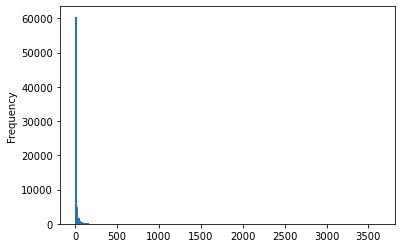

In [7]:
import matplotlib.pyplot as plt

# Look at the histogram for tag counts
tags_df['count'].plot(kind='hist', bins=200)

(0.0, 250.0)

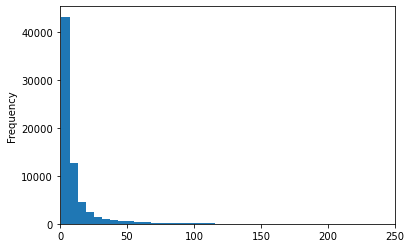

In [8]:
# Zoom in on the are with more observations
tags_df['count'].plot(kind='hist', bins=600)
plt.xlim(0,250)

(0.0, 500.0)

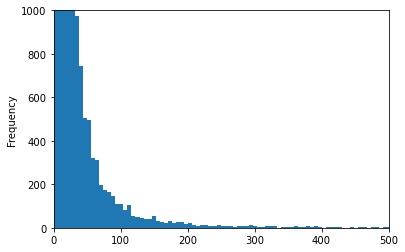

In [9]:

# Cut off some y-scale, to see smaller bars
# Remember the first bar goes all the way up above 4,000!
tags_df['count'].plot(kind='hist', bins=600)
plt.ylim(0, 1000)
plt.xlim(0, 500)

Looking at these distributions of tags and their frequency, I will take all tags that appeared more than 100 times. That seems to be the natural cutoff where tags go from being in the body of the distribution to being in the outliers.

In [10]:
# Make a nested list of all tags for all videos
tags_nested_list=[]
for tag_elem in tags_col:
    tags_list = [tag.strip() for tag in tag_elem.lower().split(sep='|')]
    tags_nested_list.append(tags_list)
len(tags_nested_list)



55974

In [11]:
# Keep just the top tag for each video
taglist_numbered = []
top_tag_list = []
for taglist in tags_nested_list:
    for tag in taglist:
        tag_tup=(tag, tags_dict[tag])
        taglist_numbered.append(tag_tup)
    tags_sort = sorted(taglist_numbered, key=lambda x: x[1], reverse=True)
    #print(tags_sort)
    top_tag_list.append(tags_sort[0][0])
    taglist_numbered = []
    
len(top_tag_list)

55974

In [12]:
data_out = pd.concat([data, pd.Series(top_tag_list, name='top_tag')], axis=1)

In [22]:
# Get rid of the now superfluous 'tags' column, replace with 'top_tag'
data_out = data_out[['video_id', 'title', 'channelId', 'channelTitle', 'publishedAt', 'trending_date',
        'publish_to_trending_days', 'category_text', 'top_tag', 'view_count', 'likes',
        'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled']]

In [23]:
data_out.to_csv(r'data\Youtube_Working_Dataset_NEW.csv', index=False)